<a href="https://colab.research.google.com/github/bestdiya/MACHINE-LEARNING-PROJECTS/blob/main/DISEASE_PREDICTION_USING_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
df=pd.read_csv('/content/Training.csv')

In [39]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [40]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [41]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [42]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
len(df['prognosis'].unique())

41

In [44]:
df['prognosis'].value_counts()

,count
prognosis,
Fungal infection,120
Allergy,120
GERD,120
Chronic cholestasis,120
Drug Reaction,120
Peptic ulcer diseae,120
AIDS,120
Diabetes,120
Gastroenteritis,120


In [45]:
X=df.drop("prognosis", axis=1)
y=df['prognosis']

In [46]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [47]:
y

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [48]:
#split data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0 )

In [49]:
x_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
613,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4155,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3321,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4224,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_train

,prognosis
613,Hepatitis B
4155,Jaundice
3803,Hypothyroidism
3321,Fungal infection
3790,Typhoid
...,...
4859,Hepatitis C
3264,Tuberculosis
1653,Allergy
2607,Alcoholic hepatitis


In [52]:
y_test

,prognosis
1525,Heart attack
1013,hepatitis A
1892,Tuberculosis
1972,Hypoglycemia
873,Peptic ulcer diseae
...,...
3871,Dengue
1366,Paralysis (brain hemorrhage)
854,Chronic cholestasis
4224,Allergy


In [53]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)

In [54]:
y_encoded


array([15, 15, 15, ..., 38, 35, 27])

In [55]:
y

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [56]:
#split data
x_train,x_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=0 )

LOGISTIC REGRESSION

In [57]:
#importing all necessary libraries
# initializing the model
# making predictions on training set
# making predictions on testing set
# evaluating accuracy
# displaying confusion matrix

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

In [60]:
ytrain_pred=logreg.predict(x_train)

In [61]:
ytest_pred=logreg.predict(x_test)

In [62]:
print("training accuracy", accuracy_score(ytrain_pred,y_train))

training accuracy 1.0


In [63]:
print("testing accuracy", accuracy_score(ytest_pred,y_test))

testing accuracy 1.0


In [64]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, ytest_pred))


Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 24]]


In [65]:
print("\nClassification Report:")
print(classification_report(y_test, ytest_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        27
   

📄 What is a Classification Report?
It is a detailed summary of model performance for classification problems.
It includes key metrics for each class such as:

Metric	Meaning
Precision	Out of all predicted as class X, how many were actually class X?
Recall	Out of all actual class X, how many did we correctly predict as X?
F1-Score	Harmonic mean of Precision and Recall (balances both)
Support	Number of actual samples belonging to each class in the test set

clubbing all the models together

SVC accuracy : 1.0
SVC confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 3, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 6, 0],
 [0, 0, 0, ..., 0, 0, 2]]


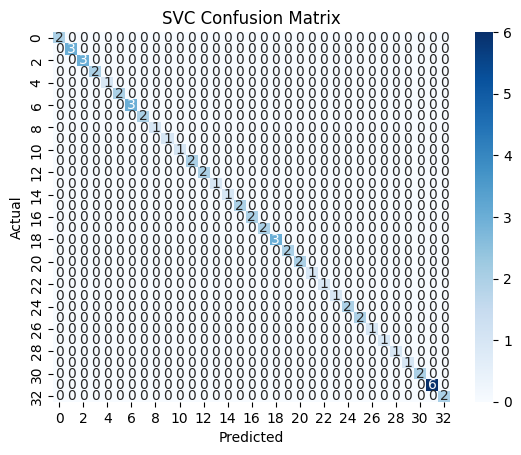

Random Forest accuracy : 1.0
Random Forest confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 3, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 6, 0],
 [0, 0, 0, ..., 0, 0, 2]]


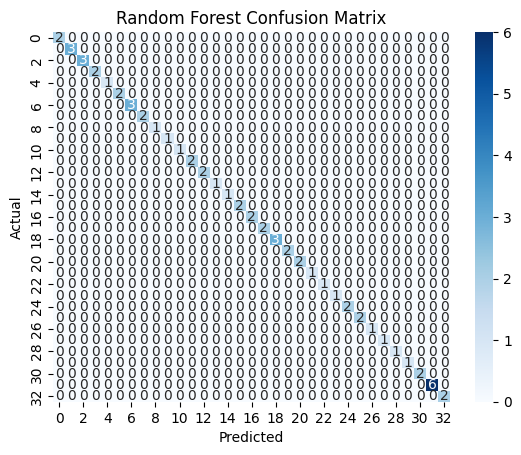

KNeighbors accuracy : 0.9836065573770492
KNeighbors confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 3, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 5, 0],
 [0, 0, 0, ..., 0, 0, 2]]


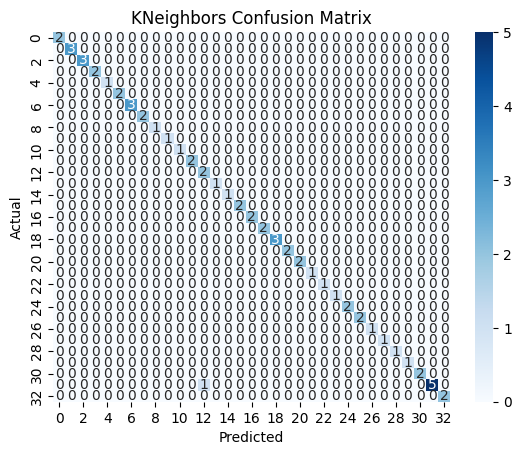

Gradient Boosting accuracy : 0.8688524590163934
Gradient Boosting confusion matrix :
[[1, 0, 0, ..., 0, 0, 0],
 [0, 2, 0, ..., 0, 0, 0],
 [0, 0, 2, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 6, 0],
 [0, 0, 0, ..., 0, 0, 2]]


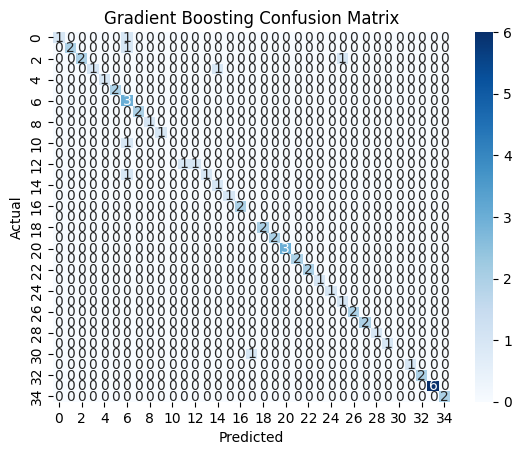

MultinomialNB accuracy : 0.8360655737704918
MultinomialNB confusion matrix :
[[0, 0, 0, ..., 0, 0, 0],
 [0, 2, 0, ..., 0, 0, 0],
 [0, 0, 2, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 2, 0, 0],
 [0, 0, 0, ..., 0, 6, 0],
 [0, 0, 0, ..., 0, 0, 2]]


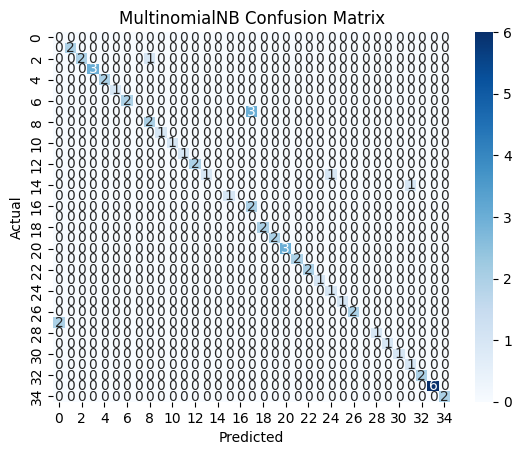

In [86]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
models = {
      'SVC' : SVC(kernel='linear'),
      'Random Forest' :RandomForestClassifier(random_state=42,n_estimators=100),
      'KNeighbors' : KNeighborsClassifier(n_neighbors=5),
      'Gradient Boosting': GradientBoostingClassifier(random_state=42,n_estimators=100),
      'MultinomialNB' :MultinomialNB()
}
for model_name , model in models.items():
    # Train model
    model.fit(x_train_cleaned,y_train_cleaned)
    # test model
    predictions = model.predict(x_test_cleaned)
    # calculate accuracy
    accuracy = accuracy_score(y_test_cleaned,predictions)
    # calculate confusion matrix
    cm = confusion_matrix(y_test_cleaned,predictions)
    # print results
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} confusion matrix :")
    print(np.array2string(cm,separator=', '))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_cleaned, y_cleaned, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.9769398907103826


In [93]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Re-encode the cleaned target variable
label_encoder_cleaned = LabelEncoder()
y_cleaned_encoded = label_encoder_cleaned.fit_transform(y_cleaned)

# Re-split the cleaned and encoded data for XGBoost
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_cleaned, y_cleaned_encoded, test_size=0.2, random_state=0)

xgb = XGBClassifier(objective='multi:softprob', num_class=len(label_encoder_cleaned.classes_), eval_metric='mlogloss')
xgb.fit(x_train_xgb, y_train_xgb)

y_pred_xgb = xgb.predict(x_test_xgb)

print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print(classification_report(y_test_xgb, y_pred_xgb, labels=np.unique(y_cleaned_encoded), target_names=label_encoder_cleaned.classes_))

XGBoost Accuracy: 0.8524590163934426
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00         0
                                   AIDS       0.00      0.00      0.00         0
                                   Acne       0.00      0.00      0.00         0
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      0.67      0.80         3
                              Arthritis       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      0.50      0.67         2
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         3
                            Common Cold       1.00      1.00      1.00 

In [81]:
print("Training set class distribution:\n", pd.Series(y_train).value_counts())
print("\nTesting set class distribution:\n", pd.Series(y_test).value_counts())

Training set class distribution:
 25    107
20    103
0     102
11    102
35    102
19    101
38    100
23    100
8      99
9      99
22     98
1      98
12     98
5      97
4      97
31     97
26     97
24     97
34     97
40     96
33     96
15     96
3      96
36     96
37     95
27     95
29     95
17     94
28     94
7      93
16     93
14     93
13     93
21     92
39     92
6      92
30     91
32     90
2      89
18     88
10     86
Name: count, dtype: int64

Testing set class distribution:
 10    34
18    32
2     31
32    30
30    29
39    28
21    28
6     28
14    27
7     27
13    27
16    27
28    26
17    26
29    25
37    25
27    25
36    24
40    24
15    24
33    24
3     24
5     23
31    23
26    23
4     23
24    23
34    23
22    22
12    22
1     22
9     21
8     21
38    20
23    20
19    19
0     18
11    18
35    18
20    17
25    13
Name: count, dtype: int64


Let's also check how the data was split.

In [82]:
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3936, 132)
Shape of X_test: (984, 132)
Shape of y_train: (3936,)
Shape of y_test: (984,)


In [83]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 4616


In [84]:
df_cleaned = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df_cleaned))

Number of rows after removing duplicates: 304


In [85]:
X_cleaned = df_cleaned.drop("prognosis", axis=1)
y_cleaned = df_cleaned['prognosis']

# Re-split the cleaned data
x_train_cleaned, x_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=0)

print("Shape of x_train_cleaned:", x_train_cleaned.shape)
print("Shape of x_test_cleaned:", x_test_cleaned.shape)
print("Shape of y_train_cleaned:", y_train_cleaned.shape)
print("Shape of y_test_cleaned:", y_test_cleaned.shape)

Shape of x_train_cleaned: (243, 132)
Shape of x_test_cleaned: (61, 132)
Shape of y_train_cleaned: (243,)
Shape of y_test_cleaned: (61,)


#RECOMMENDATION SYSTEM


# Task
Build a recommendation system based on the predicted disease prognosis from the previously trained classification models.

## Understand the goal

### Subtask:
Clarify what kind of recommendations should be provided based on the predicted prognosis (e.g., recommended treatments, lifestyle changes, further tests).


## Gather recommendation data

### Subtask:
Obtain or create a dataset that links each disease prognosis to relevant recommendations.


**Reasoning**:
Manually create a dictionary mapping each unique disease prognosis to a list of general recommendations.



In [101]:
disease_recommendations = {
    'Fungal infection': ["Avoid sharing personal items like towels and clothing.", "Keep the affected area clean and dry.", "Consult a healthcare professional for antifungal medication.", "Seek medical advice for a proper diagnosis and treatment plan."],
    'Allergy': ["Identify and avoid allergens.", "Keep your living environment clean.", "Consider over-the-counter antihistamines, but consult a doctor if symptoms persist.", "Consult a healthcare professional for diagnosis and personalized management."],
    'GERD': ["Avoid large meals, especially before bedtime.", "Identify and avoid trigger foods.", "Maintain a healthy weight.", "Elevate the head of your bed.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Chronic cholestasis': ["Follow a low-fat diet as recommended by a doctor.", "Consult a healthcare professional for diagnosis and management.", "Seek medical advice for persistent symptoms."],
    'Drug Reaction': ["Identify and stop using the offending drug, but only under medical supervision.", "Seek immediate medical attention for severe reactions.", "Consult a healthcare professional for management and alternative medications."],
    'Peptic ulcer diseae': ["Avoid spicy foods, alcohol, and smoking.", "Consult a healthcare professional for diagnosis and treatment.", "Do not self-medicate with over-the-counter pain relievers without consulting a doctor."],
    'AIDS': ["Follow the prescribed treatment plan rigorously.", "Maintain a healthy lifestyle with proper nutrition and exercise.", "Seek regular medical check-ups.", "Consult a healthcare professional for ongoing care and support."],
    'Diabetes': ["Monitor your blood sugar levels regularly.", "Follow a healthy diet and exercise plan.", "Take medications as prescribed by your doctor.", "Attend regular medical check-ups.", "Consult a healthcare professional for personalized management."],
    'Gastroenteritis': ["Stay hydrated by drinking clear fluids.", "Eat bland foods gradually as tolerated.", "Avoid dairy products, caffeine, and alcohol.", "Consult a healthcare professional if symptoms are severe or persist."],
    'Bronchial Asthma': ["Identify and avoid asthma triggers.", "Use prescribed inhalers as directed.", "Have an asthma action plan and know when to seek emergency care.", "Consult a healthcare professional for diagnosis and management."],
    'Hypertension': ["Monitor your blood pressure regularly.", "Follow a healthy diet and exercise plan.", "Take blood pressure medications as prescribed.", "Reduce salt intake.", "Consult a healthcare professional for personalized management."],
    'Migraine': ["Identify and avoid migraine triggers.", "Manage stress effectively.", "Consult a healthcare professional for diagnosis and treatment options.", "Consider lifestyle changes and medication as recommended by a doctor."],
    'Cervical spondylosis': ["Maintain good posture.", "Use proper lifting techniques.", "Consult a healthcare professional for diagnosis and treatment options, such as physical therapy or medication."],
    'Paralysis (brain hemorrhage)': ["Follow the rehabilitation plan diligently.", "Seek ongoing medical care and support.", "Consult a healthcare professional for management and recovery strategies."],
    'Jaundice': ["Consult a healthcare professional immediately for diagnosis and treatment.", "Avoid alcohol.", "Follow dietary recommendations from a doctor."],
    'Malaria': ["Seek immediate medical attention for diagnosis and treatment.", "Complete the full course of antimalarial medication.", "Use mosquito nets and repellents to prevent further infection.", "Consult a healthcare professional for prevention and management."],
    'Chicken pox': ["Stay home and avoid contact with others until lesions have crusted over.", "Relieve itching with calamine lotion or oatmeal baths.", "Consult a healthcare professional for advice on managing symptoms and preventing complications."],
    'Dengue': ["Stay hydrated with clear fluids.", "Rest adequately.", "Avoid aspirin and other NSAIDs.", "Seek immediate medical attention if symptoms worsen.", "Consult a healthcare professional for diagnosis and management."],
    'Typhoid': ["Seek immediate medical attention for diagnosis and treatment.", "Complete the full course of antibiotics.", "Ensure good hygiene to prevent spreading the infection.", "Consult a healthcare professional for prevention and management."],
    'hepatitis A': ["Rest adequately.", "Stay hydrated.", "Avoid alcohol.", "Consult a healthcare professional for management and monitoring."],
    'Hepatitis B': ["Seek regular medical check-ups.", "Follow the prescribed treatment plan.", "Avoid alcohol.", "Consult a healthcare professional for ongoing care and management."],
    'Hepatitis C': ["Seek regular medical check-ups.", "Follow the prescribed treatment plan.", "Avoid alcohol.", "Consult a healthcare professional for ongoing care and management."],
    'Hepatitis D': ["Seek regular medical check-ups.", "Follow the prescribed treatment plan.", "Avoid alcohol.", "Consult a healthcare professional for ongoing care and management."],
    'Hepatitis E': ["Rest adequately.", "Stay hydrated.", "Avoid alcohol.", "Consult a healthcare professional for management and monitoring."],
    'Alcoholic hepatitis': ["Abstain from alcohol completely.", "Follow dietary recommendations from a doctor.", "Seek medical attention for management and support.", "Consult a healthcare professional for treatment and recovery."],
    'Tuberculosis': ["Complete the full course of prescribed medication exactly as directed.", "Ensure good ventilation in living spaces.", "Cover your mouth and nose when coughing or sneezing.", "Consult a healthcare professional for diagnosis, treatment, and prevention."],
    'Common Cold': ["Get plenty of rest.", "Stay hydrated.", "Relieve symptoms with over-the-counter remedies, but consult a doctor if symptoms are severe or persist.", "Consult a healthcare professional for advice."],
    'Pneumonia': ["Seek medical attention for diagnosis and treatment.", "Complete the full course of prescribed antibiotics if bacterial.", "Get plenty of rest and fluids.", "Avoid smoking.", "Consult a healthcare professional for management and recovery."],
    'Dimorphic hemmorhoids(piles)': ["Increase fiber intake and drink plenty of water.", "Avoid straining during bowel movements.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Heart attack': ["Seek immediate emergency medical attention.", "Follow the treatment plan prescribed by your doctor.", "Make lifestyle changes as recommended by a healthcare professional.", "Consult a healthcare professional for ongoing care and rehabilitation."],
    'Varicose veins': ["Elevate your legs when resting.", "Avoid prolonged standing or sitting.", "Consider compression stockings.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Hypothyroidism': ["Take thyroid hormone medication as prescribed.", "Attend regular medical check-ups to monitor thyroid levels.", "Consult a healthcare professional for personalized management."],
    'Hyperthyroidism': ["Follow the treatment plan prescribed by your doctor.", "Attend regular medical check-ups to monitor thyroid levels.", "Consult a healthcare professional for personalized management."],
    'Hypoglycemia': ["Recognize the symptoms of low blood sugar.", "Carry a source of fast-acting carbohydrates.", "Monitor blood sugar levels regularly.", "Consult a healthcare professional for personalized management."],
    'Osteoarthristis': ["Manage pain with medication as recommended by a doctor.", "Engage in low-impact exercise.", "Maintain a healthy weight.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Arthritis': ["Manage pain and inflammation with medication as recommended by a doctor.", "Engage in regular, gentle exercise.", "Maintain a healthy weight.", "Consult a healthcare professional for diagnosis and personalized management."],
    '(vertigo) Paroymsal  Positional Vertigo': ["Avoid sudden head movements.", "Follow exercises recommended by a healthcare professional.", "Consult a healthcare professional for diagnosis and management."],
    'Acne': ["Maintain good skin hygiene.", "Avoid picking or squeezing acne lesions.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Urinary tract infection': ["Drink plenty of water.", "Consult a healthcare professional for diagnosis and antibiotic treatment.", "Do not self-medicate.", "Complete the full course of antibiotics."],
    'Psoriasis': ["Keep the skin moisturized.", "Avoid triggers that worsen symptoms.", "Consult a healthcare professional for diagnosis and treatment options."],
    'Impetigo': ["Keep the affected area clean.", "Avoid scratching the lesions.", "Consult a healthcare professional for diagnosis and antibiotic treatment.", "Avoid close contact with others until lesions are healed."]
}

## Integrate with the trained model

### Subtask:
Use the trained classification model to predict the prognosis for a given set of symptoms.


**Reasoning**:
Select the SVC model as it achieved 100% accuracy in cross-validation and predict the prognosis for a sample data point, then decode the prediction.



In [104]:
from sklearn.svm import SVC

# Train a new SVC model on the entire cleaned dataset
svc_full_data = SVC(kernel='linear')
svc_full_data.fit(X_cleaned, y_cleaned_encoded_full)

# Create a sample data point with the same features as X_cleaned
# This is a hypothetical example. Replace with actual symptom data if available.
# The sample data point should have the same columns as X_cleaned and be a pandas DataFrame.
# Let's create a sample with all symptoms set to 0 except for 'itching' and 'skin_rash'
sample_symptoms = pd.DataFrame(np.zeros((1, X_cleaned.shape[1])), columns=X_cleaned.columns)
sample_symptoms['itching'] = 1
sample_symptoms['skin_rash'] = 1

# Predict the prognosis for the sample data point using the model trained on the full data
predicted_encoded_prognosis = svc_full_data.predict(sample_symptoms)

# Decode the predicted prognosis using the label encoder fitted on the full cleaned data
predicted_prognosis = label_encoder_cleaned.inverse_transform(predicted_encoded_prognosis)

print("Predicted prognosis:", predicted_prognosis[0])

Predicted prognosis: Fungal infection


In [107]:
from sklearn.svm import SVC

# Train a new SVC model on the entire cleaned dataset
svc_full_data = SVC(kernel='linear')
svc_full_data.fit(X_cleaned, y_cleaned_encoded_full)

# Create a sample data point with the same features as X_cleaned
# This is a hypothetical example. Replace with actual symptom data if available.
# The sample data point should have the same columns as X_cleaned and be a pandas DataFrame.
# Let's create a sample with all symptoms set to 0 except for 'itching' and 'skin_rash'
sample_symptoms = pd.DataFrame(np.zeros((1, X_cleaned.shape[1])), columns=X_cleaned.columns)
sample_symptoms['itching'] = 1
sample_symptoms['skin_rash'] = 1

# Predict the prognosis for the sample data point using the model trained on the full data
predicted_encoded_prognosis = svc_full_data.predict(sample_symptoms)

# Decode the predicted prognosis using the label encoder fitted on the full cleaned data
predicted_prognosis = label_encoder_cleaned.inverse_transform(predicted_encoded_prognosis)

print("Predicted prognosis:", predicted_prognosis[0])

Predicted prognosis: Fungal infection


## Implement the recommendation logic

### Subtask:
Retrieve the recommendations based on the predicted prognosis.

**Reasoning**:
Check if the predicted prognosis exists as a key in the `disease_recommendations` dictionary and, if so, retrieve the corresponding list of recommendations.

In [108]:
# Implement the recommendation logic
if predicted_prognosis[0] in disease_recommendations:
    recommendations = disease_recommendations[predicted_prognosis[0]]
    print("\nRecommended actions/treatments:")
    for i, recommendation in enumerate(recommendations):
        print(f"{i+1}. {recommendation}")
else:
    print(f"\nNo specific recommendations found for '{predicted_prognosis[0]}'.")


Recommended actions/treatments:
1. Avoid sharing personal items like towels and clothing.
2. Keep the affected area clean and dry.
3. Consult a healthcare professional for antifungal medication.
4. Seek medical advice for a proper diagnosis and treatment plan.


In [110]:
# Train each model on the entire cleaned dataset
trained_models_full_data = {}
for model_name, model in models.items():
    print(f"Training {model_name} on the full cleaned data...")
    # For models that require encoded labels (like XGBoost and potentially others depending on implementation),
    # use the y_cleaned_encoded_full. For models that can handle string labels (like RF, SVC, KNN, NB),
    # you could use y_cleaned, but using encoded for all ensures consistency with the LabelEncoder.
    # Since we already fitted label_encoder_cleaned on y_cleaned_encoded_full, we will use y_cleaned_encoded_full here.
    trained_models_full_data[model_name] = model.fit(X_cleaned, y_cleaned_encoded_full)
    print(f"{model_name} training complete.")

print("\nGenerating recommendations for sample symptoms using models trained on full data:")

# Create a sample data point with the same features as X_cleaned
# This is a hypothetical example. Replace with actual symptom data if available.
# The sample data point should have the same columns as X_cleaned and be a pandas DataFrame.
# Let's create a sample with all symptoms set to 0 except for 'itching' and 'skin_rash'
sample_symptoms = pd.DataFrame(np.zeros((1, X_cleaned.shape[1])), columns=X_cleaned.columns)
sample_symptoms['itching'] = 1
sample_symptoms['skin_rash'] = 1

# Iterate through all trained models (on full data)
for model_name, model in trained_models_full_data.items():
    print(f"Recommendations based on {model_name} prediction:")

    # Predict the prognosis for the sample data point
    predicted_encoded_prognosis = model.predict(sample_symptoms)

    # Decode the predicted prognosis using the label encoder fitted on the full cleaned data
    predicted_prognosis = label_encoder_cleaned.inverse_transform(predicted_encoded_prognosis)

    print("  Predicted prognosis:", predicted_prognosis[0])

    # Implement the recommendation logic
    if predicted_prognosis[0] in disease_recommendations:
        recommendations = disease_recommendations[predicted_prognosis[0]]
        print("  Recommended actions/treatments:")
        for i, recommendation in enumerate(recommendations):
            print(f"  {i+1}. {recommendation}")
    else:
        print(f"  No specific recommendations found for '{predicted_prognosis[0]}'.")
    print("-" * 30) # Separator for different models

Training SVC on the full cleaned data...
SVC training complete.
Training Random Forest on the full cleaned data...
Random Forest training complete.
Training KNeighbors on the full cleaned data...
KNeighbors training complete.
Training Gradient Boosting on the full cleaned data...
Gradient Boosting training complete.
Training MultinomialNB on the full cleaned data...
MultinomialNB training complete.

Generating recommendations for sample symptoms using models trained on full data:
Recommendations based on SVC prediction:
  Predicted prognosis: Fungal infection
  Recommended actions/treatments:
  1. Avoid sharing personal items like towels and clothing.
  2. Keep the affected area clean and dry.
  3. Consult a healthcare professional for antifungal medication.
  4. Seek medical advice for a proper diagnosis and treatment plan.
------------------------------
Recommendations based on Random Forest prediction:
  Predicted prognosis: Fungal infection
  Recommended actions/treatments:
  1. Av